Preprocessing
----

When calculating distances, we usually want the features to be measured on thes same scale. One popular way of doing this is to transform each feature so that it has a mean of zero (centering) and a standard devaition of one (scaling). 

In [19]:
x <- matrix(rnorm(20), nrow=5)
colnames(x) <- paste("Feature", 1:4)
rownames(x) <- paste("PDD", 1:5)
x <- matrix(rep(c(1,2,10,100), 5), nrow=5, byrow = TRUE) * x
x

        Feature 1  Feature 2   Feature 3  Feature 4
PDD 1 -0.09104189 -1.4187082 18.06505486  144.86263
PDD 2  1.62256422 -3.7505465 -0.09577914 -122.28021
PDD 3  0.65689300 -0.0346047  5.96009367   94.46335
PDD 4  0.13740975 -1.1385663 14.67451377 -123.06995
PDD 5 -0.86270720  1.7577482 -8.69218088   29.31331

#### Pairwise distances

In [23]:
dist(x, method = "euclidean", upper = FALSE)

          PDD 1     PDD 2     PDD 3     PDD 4
PDD 2 267.77506                              
PDD 3  51.85646 216.86213                    
PDD 4 267.95427  15.09349 217.71120          
PDD 5 118.65193 151.95727  66.81870 154.19484

#### Scaling

In [25]:
y <- scale(x, center = TRUE, scale = TRUE)
y

       Feature 1  Feature 2    Feature 3  Feature 4
PDD 1 -0.4156845 -0.2488518  1.110152276  1.1376045
PDD 2  1.4409318 -1.4053162 -0.558453844 -1.0299596
PDD 3  0.3946698  0.4375879 -0.002044021  0.7286710
PDD 4 -0.1681673 -0.1099167  0.798631472 -1.0363674
PDD 5 -1.2517497  1.3264970 -1.348285883  0.2000516
attr(,"scaled:center")
 Feature 1  Feature 2  Feature 3  Feature 4 
 0.2926236 -0.9169355  5.9823405  4.6578255 
attr(,"scaled:scale")
  Feature 1   Feature 2   Feature 3   Feature 4 
  0.9229727   2.0163512  10.8838352 123.2456498 

In [30]:
apply(y, MARGIN = 2, FUN = mean)

    Feature 1     Feature 2     Feature 3     Feature 4 
 4.993835e-17 -1.387779e-17  2.923009e-17 -5.567378e-18 

In [29]:
apply(y, 2, sd)

Feature 1 Feature 2 Feature 3 Feature 4 
        1         1         1         1 

#### Pairwsie distances

In [15]:
dist(y)

          1         2         3         4
2 3.2878380                              
3 2.8148254 4.6965713                    
4 1.4353103 2.2682385 2.7823988          
5 0.8880566 3.1622590 3.2858397 1.6361734

Dimension reduction
----

### Principal Components Analysis (PCA)

In [2]:
head(iris, 3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [4]:
ir <- iris[,1:4]

In [5]:
ir.pca <- prcomp(ir,
                 center = TRUE,
                 scale. = TRUE)

In [9]:
summary(ir.pca)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

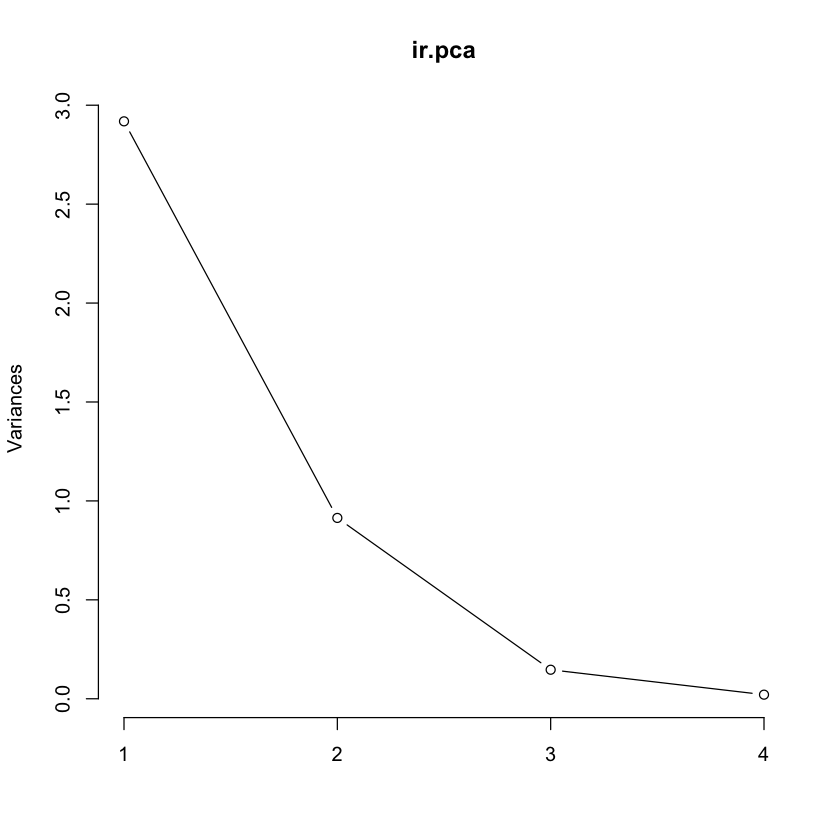

In [8]:
plot(ir.pca, type="l")

In [40]:
options(warn=-1)
library(devtools)
suppressMessages(install_github("vqv/ggbiplot"))
library(ggbiplot)
options(warn=0)

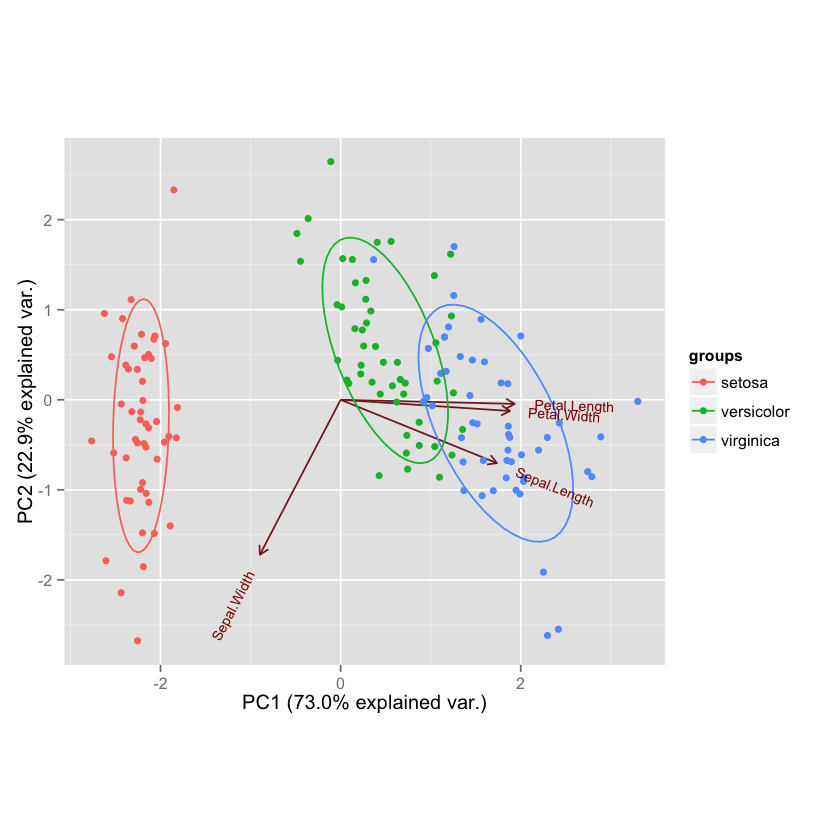

In [41]:
ggbiplot(ir.pca, groups = iris$Species, var.scale=1, obs.scale=1, ellipse = TRUE)

### Classic Multi-Dimensional Scaling

In [45]:
ir.mds <- cmdscale(dist(ir), k = 2)

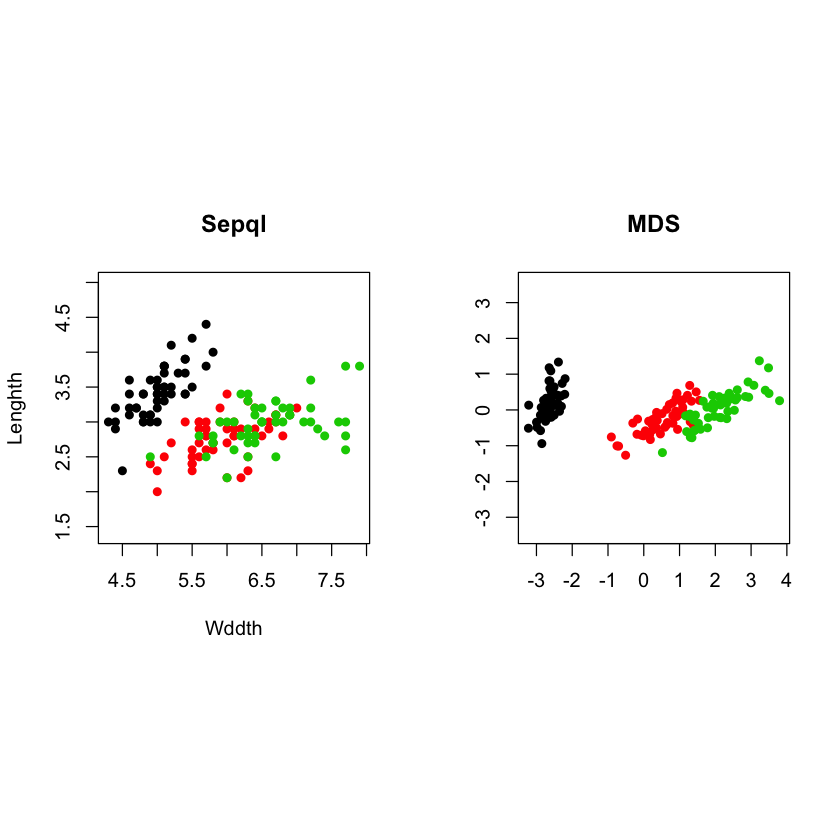

In [67]:
par(mfrow=c(1,2), pty="s")
plot(iris[,1], iris[,2], type = "p", asp = 1, col=iris$Species, pch=16, main="Sepql", xlab="Wddth", ylab="Length")
plot(ir.mds[,1], ir.mds[,2], type = "p", asp = 1, col=iris$Species, pch=16, main="MDS", xlab="", ylab="")

Clustering
----

### k-means clustering

In [68]:
ir.kmeans <- kmeans(ir, centers=3)

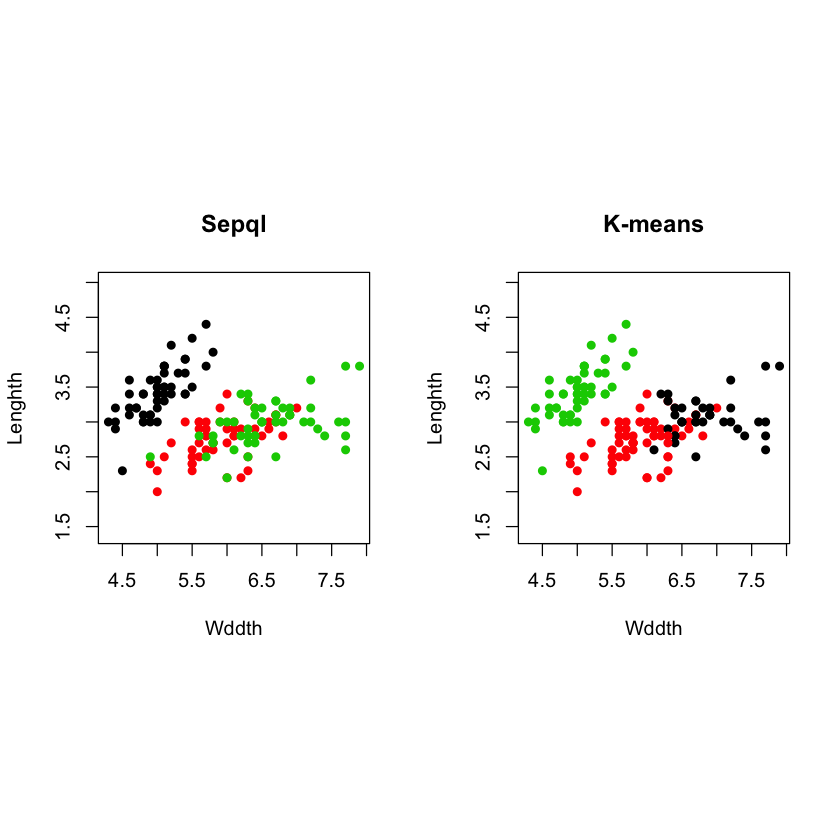

In [71]:
par(mfrow=c(1,2), pty="s")
plot(iris[,1], iris[,2], type = "p", asp = 1, col=iris$Species, pch=16, main="Sepql", xlab="Wddth", ylab="Length")
plot(iris[,1], iris[,2], type = "p", asp = 1, col=ir.kmeans$cluster, pch=16, 
     main="K-means", xlab="Wddth", ylab="Length")

### Agglomerative Hiearchical Clustering

In [72]:
ir.ahc <- hclust(dist(ir))

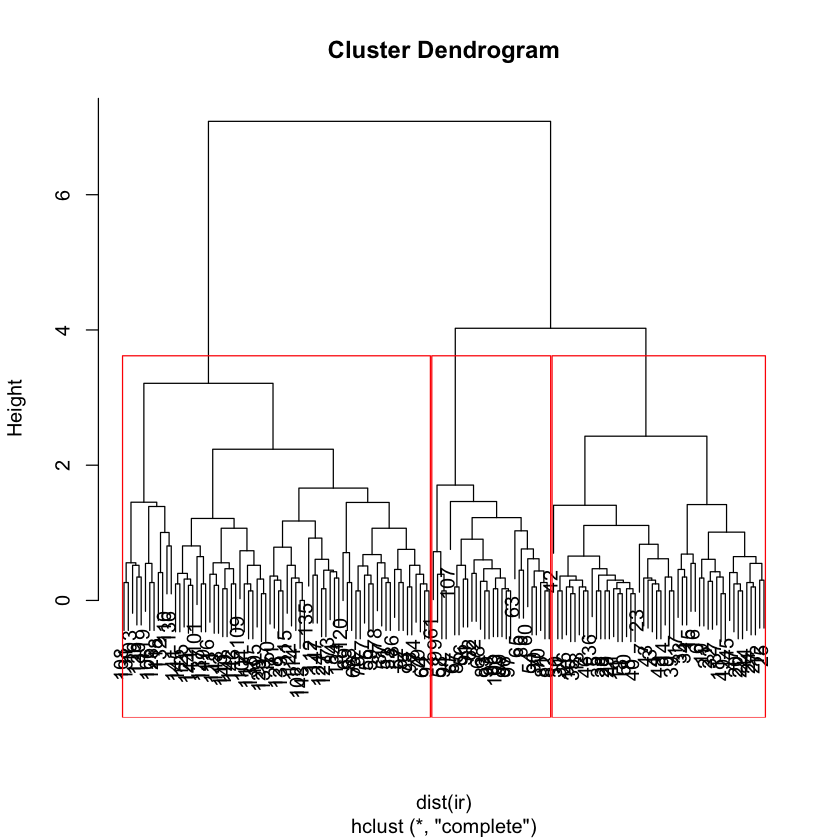

In [79]:
plot(ir.ahc)
rect.hclust(ir.ahc, k=3, border = "red")

In [74]:
groups <- cutree(ir.ahc, k=3)

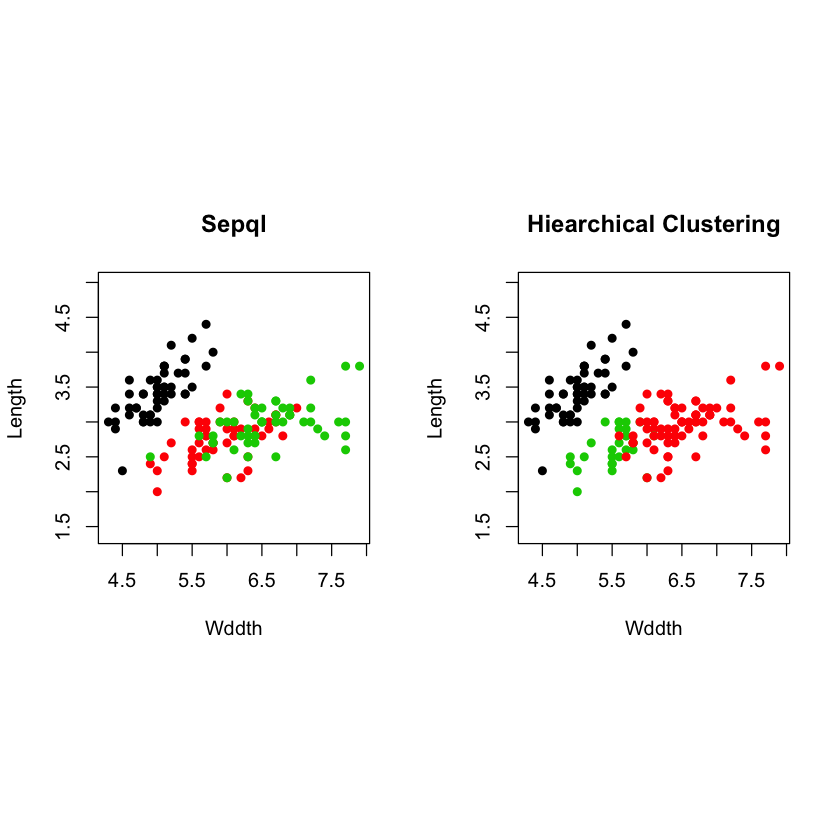

In [76]:
par(mfrow=c(1,2), pty="s")
plot(iris[,1], iris[,2], type = "p", asp = 1, col=iris$Species, pch=16, main="Sepql", xlab="Wddth", ylab="Length")
plot(iris[,1], iris[,2], type = "p", asp = 1, col=groups, pch=16, 
     main="Hiearchical Clustering", xlab="Wddth", ylab="Length")

Heatmaps
----

Heatmaps are a grpahical means of displaying the results of agglomerative hierarchical clustering and a matrix of values (e.g. gene expression).

In [3]:
library(pheatmap)

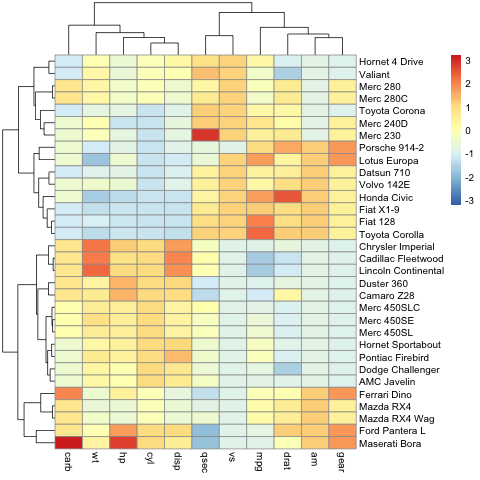

In [6]:
pheatmap(mtcars, scale="column")